## General information about this notebook

This notebook series has been initiated by the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author(s) of this notebook: 
 - Janna E. Rückert, [Institute of Environmental Physics, University of Bremen](https://www.seaice.uni-bremen.de/start/), Otto-Hahn-Allee 1, 28359 Bremen, janna.rueckert@uni-bremen.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

This notebook is licensed under the [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

# Dataset description

**Title:** Gridded daily satellite product of a multi-parameter retrieval

**Authors** Janna E. Rückert

**Description** The multi-parameter retrieval is based on the inversion of a forward model using optimal estimation to obtain the most likely set of nine geophysical atmospheric and surface parameters and their uncertainties, namely **integrated water vapor (also called precipitable water), liquid water path, sea ice concentration, multi-year ice fraction, snow depth, snow-ice interface temperature and snow-air interface temperature as well as sea-surface temperature and wind speed** (over open ocean). Over open ocean, the provided snow depth, snow-ice interface temperature and snow-air interface temperature are given by the a priori data and contain no additional information from the satellite measurements, likewise, over sea ice, sea-surface temperature and wind speed are given by the a priori data.
The method and an evaluation against in-situ measurements from the MOSAiC campaign (www.mosaic-expedition.org) is described in Rückert et al. 2023 (https://doi.org/10.1029/2023EA003177).

The product is available for freezing conditions, that is, from October until May and for the Arctic only. Data is available as daily, gridded data product (on the EASE grid (https://nsidc.org/data/user-resources/help-center/guide-ease-grids) with 25 km resolution).

**Year** 2024      

**Institute**  Institute of Environmental Physics, University of Bremen 

Data is availabe via https://www.seaice.uni-bremen.de/

**License**    [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

## Contents of this notebook

The purpose of this notebook is to show how to read and plot the multi-parameter data set. It contains the following examples:

    importing the data for a specific day
    plotting all parameters and their retrieval uncertainties for one day
    
    



## Import relevant modules


In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from datetime import datetime, timedelta
import cmocean #colormaps
import matplotlib.pyplot as plt   
from cmcrameri import cm ##more colormaps
import pandas as pd
import numpy as np

## Pre-processing of the imported data

we first import the data and have a look at the structure. The data is gridded on the EASE grid and contains the following parameters:
-    **snd**:  integrated water vapor/atmosphere_mass_content_of_water_vapor
-    **sic**:  sea ice concentration/sea_ice_area_fraction
-    **myif**:  multi-year ice fraction
-    **lwp**:  liquid water path/atmosphere_mass_content_of_cloud_liquid_water
-    **tsi**:  snow-ice interface temperature/sea_ice_surface_temperature
-    **tsa**:  snow-air interface temperature/surface_temperature
-    **sst**:  sea surface temperature
-    **wsp**:  wind speed
-    **lon**:  longitude
-    **lat**:  latitude
-    **var_snd**:  variance of snd
-    **var_iwv**:  variance of iwv
-    **var_sic**:  variance of sic
-    **var_myif**:  variance of myif
-    **var_lwp**:  variance of lwp
-    **var_tsi**:  variance of tsi
-    **var_tsa**:  variance of tsa
-    **var_sst**:  variance of sst
-    **var_wsp**:  variance of wsp
-    **crs**:  variable containing grid mapping information

In [4]:
data = xr.open_dataset("/mnt/web/data/MultiParameter/AMSR2/EASE_25/netcdf/2023/mpr_retrieval_amsr_20230101_ease_25_v0.2.nc") ##import the data
data ## have a look at the data

<xarray.Dataset>
Dimensions:   (x: 720, y: 720)
Coordinates:
  * x         (x) int64 -8987500 -8962500 -8937500 ... 8937500 8962500 8987500
  * y         (y) int64 -8987500 -8962500 -8937500 ... 8937500 8962500 8987500
    time      datetime64[ns] ...
Data variables: (12/21)
    snd       (x, y) float64 ...
    iwv       (x, y) float64 ...
    sic       (x, y) float64 ...
    myif      (x, y) float64 ...
    lwp       (x, y) float64 ...
    tsi       (x, y) float64 ...
    ...        ...
    var_lwp   (x, y) float64 ...
    var_tsi   (x, y) float64 ...
    var_tsa   (x, y) float64 ...
    var_sst   (x, y) float64 ...
    var_wsp   (x, y) float64 ...
    crs       |S1 ...
Attributes: (12/15)
    description:                     Multi-parameter retrieval output: maximu...
    author:                          University of Bremen, Janna Rückert
    version:                         0.2
    history:                         Created Sat Dec  9 11:54:03 2023
    conventions:                     CF-1.7
    title:                           Multi-parameter retrieval: retrieved par...
    ...                              ...
    hemisphere:                      Northern Hemisphere
    grid_mapping_name:               lambert_azimuthal_equal_area
    longitude_of_projection_origin:  0
    latitude_of_projection_origin:   90
    false_easting:                   0
    false_northing:                  0

In [5]:
data.sic ##have a look at one variable (sic = sea ice concentration)

<xarray.DataArray 'sic' (x: 720, y: 720)>
[518400 values with dtype=float64]
Coordinates:
  * x        (x) int64 -8987500 -8962500 -8937500 ... 8937500 8962500 8987500
  * y        (y) int64 -8987500 -8962500 -8937500 ... 8937500 8962500 8987500
    time     datetime64[ns] 2023-01-01
Attributes:
    units:                1
    long_name:            sea ice concentration
    standard_name:        sea_ice_area_fraction
    ancillary_variables:  var_sic
    grid_mapping:         crs
    coordinates:          lon lat reference_time time

In [6]:
day = pd.to_datetime(data.time.values) ##day as a panda datetime object
lon = data.lon.values
lat = data.lat.values

## Plotting example


### define colors

In [7]:
cmice= cmocean.cm.ice.copy()
cmice.set_bad("grey")
cmtwv = cmocean.cm.rain_r.copy()
cmtwv.set_bad("grey")
cmclw = cmocean.cm.dense_r.copy()
cmclw.set_bad("grey")
cmt = cmocean.cm.thermal.copy()
cmt.set_bad("grey")
cmwsp = cmocean.cm.speed.copy()
cmwsp.set_bad("grey")
cmsnd  = cm.devon.copy()
cmsnd.set_bad("grey")
cmvar=cm.batlowW.copy()
cmvar.set_bad("grey")


### plot daily maps
For plotting, we combine sea surface temperature (sst) and snow-air interface temperature (tsa) in one plot by weighting them with the sea ice concentration (sic). Wind speed (wsp) is masked out in areas where sic>0.15 because there, the retrieval carries no additional information but reprocudes the a priori. Vice versa, data that is only retrieved over sea ice (tsi and snd) are masked out where sic <0.15.

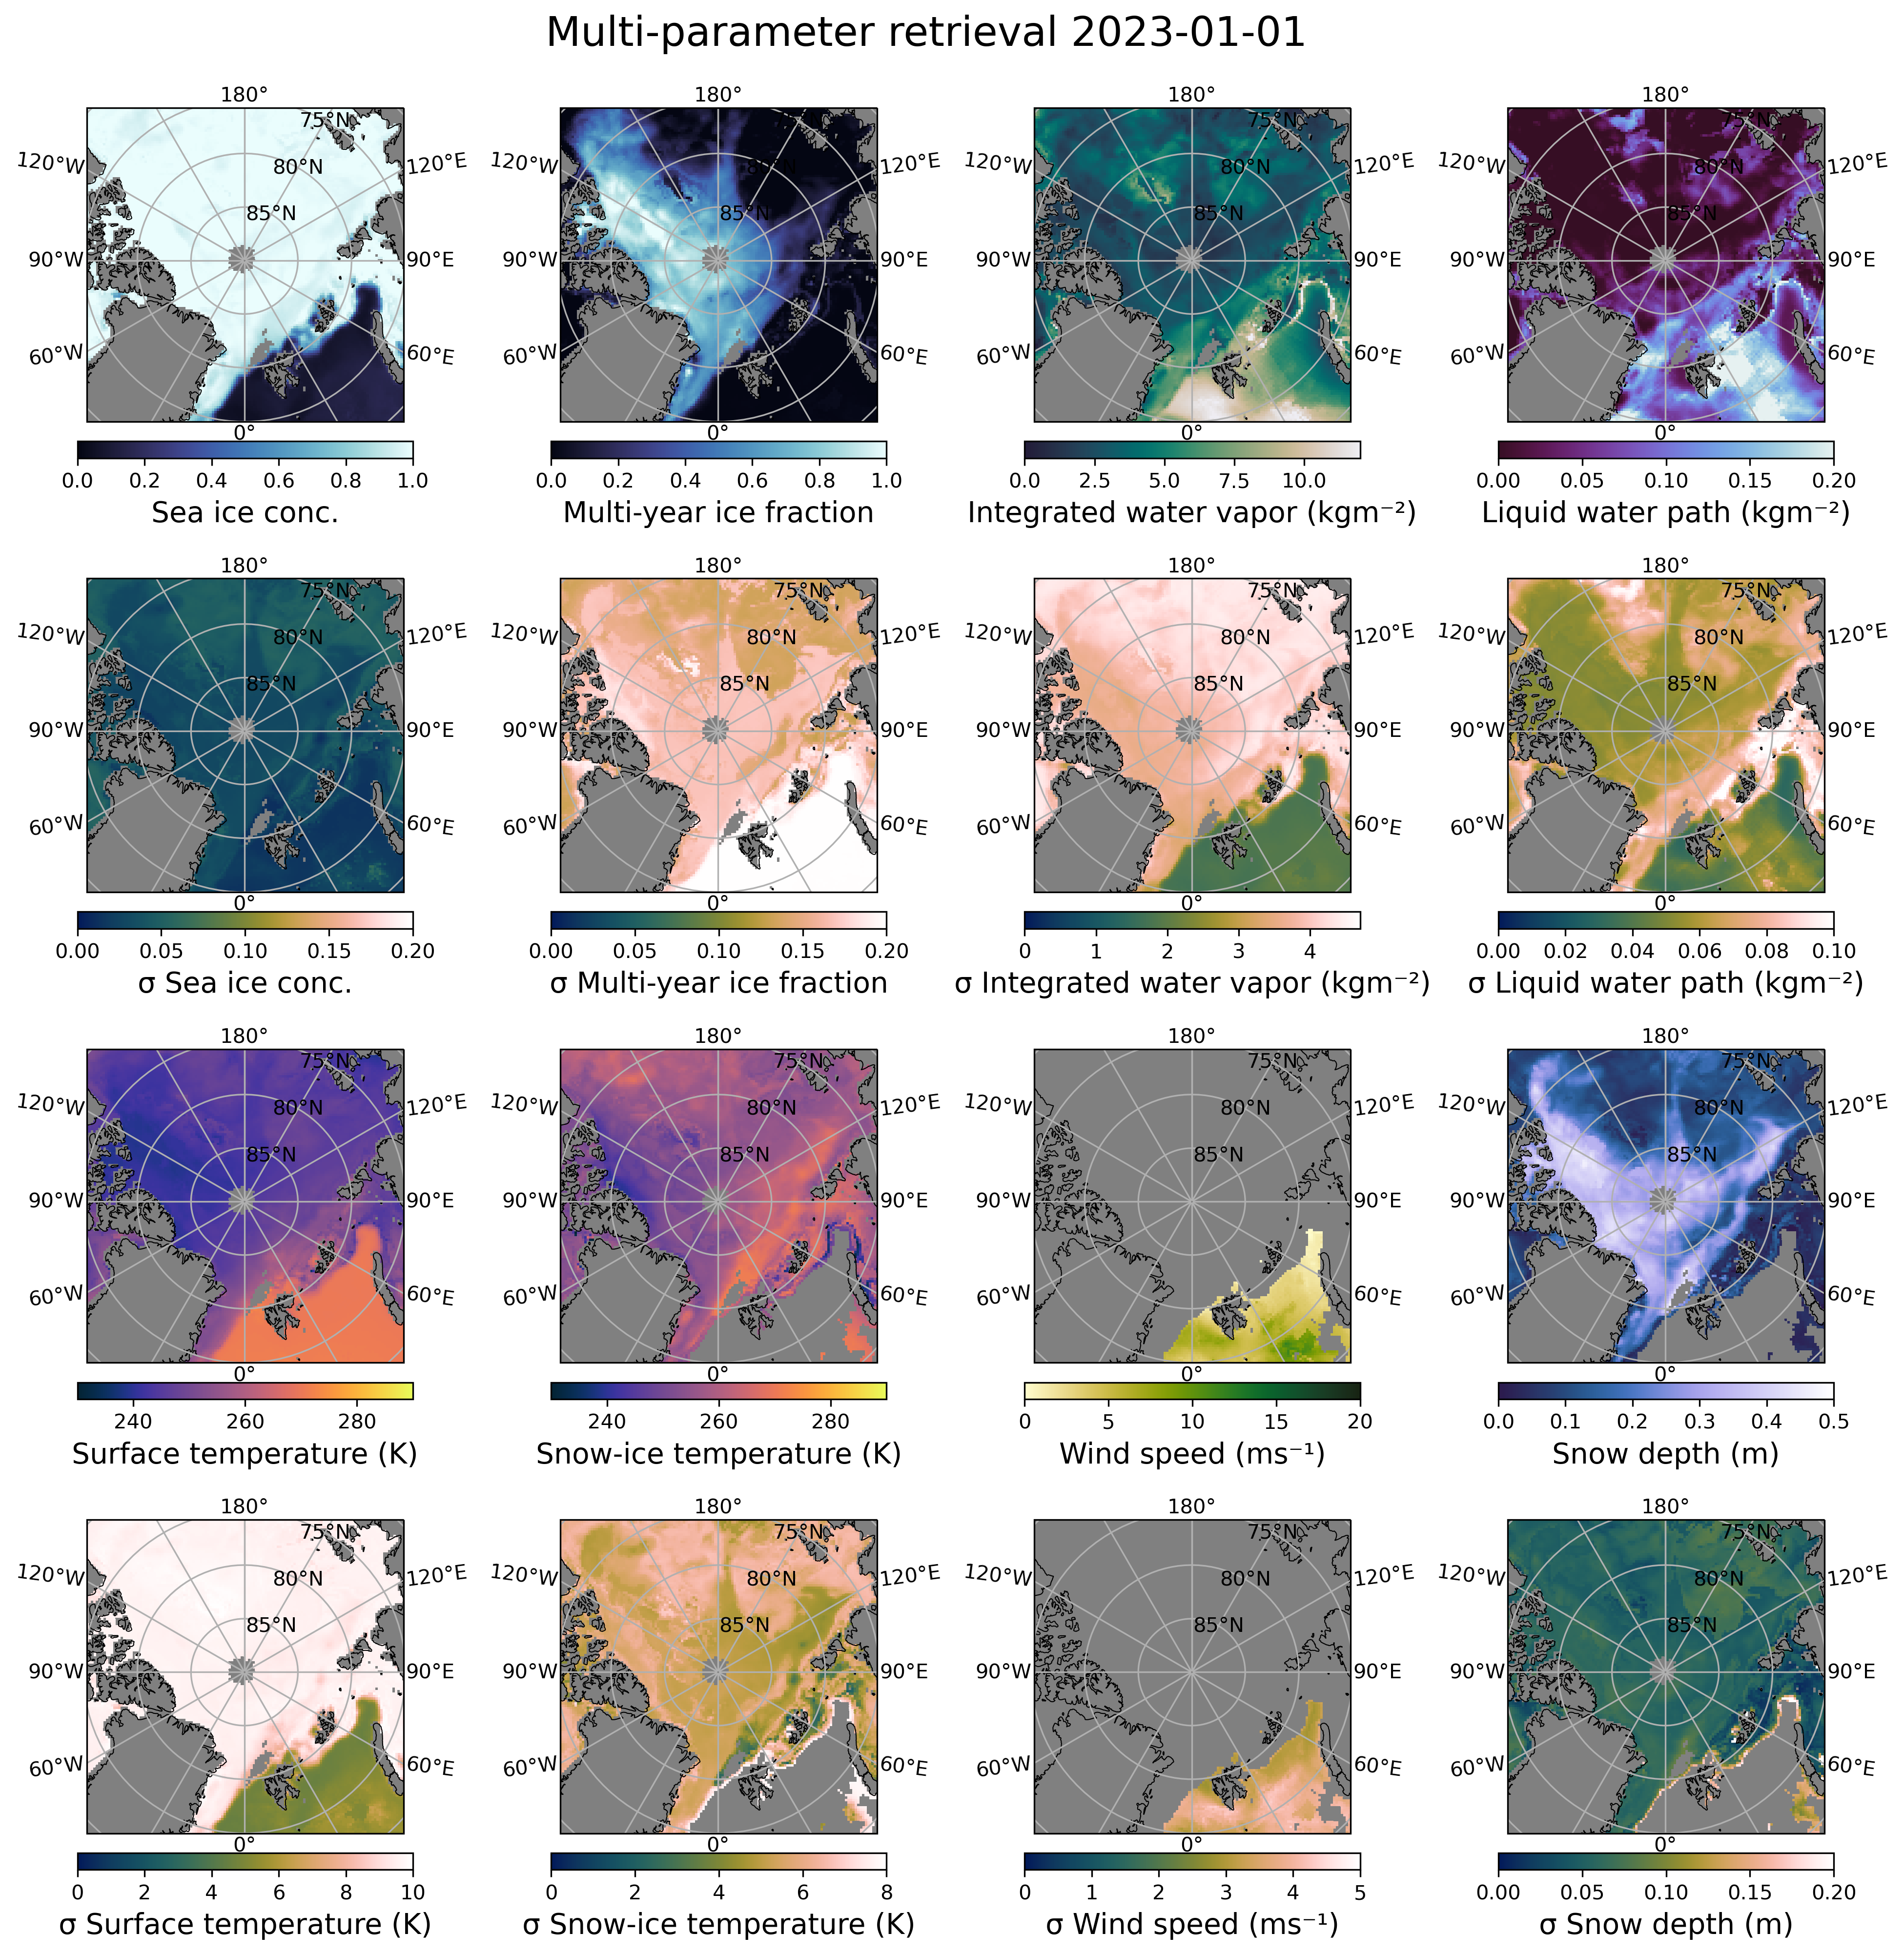

In [11]:
extent = [0.003, 360, 75, 90] ##define extent of maps (min lon, max lon, min lat, max lat)
font_size=14

npstere = ccrs.NorthPolarStereo(central_longitude=0.0, true_scale_latitude=70) #projection that is used for the map
fig=plt.figure( figsize=(16,16),dpi = 300)#

gs = fig.add_gridspec(4,4, hspace=0.2, wspace=0.2) 
row = []
for i in range(4):
    for j in range(4):
        row = np.append(row,fig.add_subplot(gs[i,j], projection=npstere) )

   #configure subplot 1 (background etc)
fig.suptitle(f'Multi-parameter retrieval {day:%Y-%m-%d}', size=20, x=0.5, y=0.92)
for i in range(len(row)):#plot subplots for each variable
    row[i].coastlines(resolution='50m',linewidth=0.5, zorder=2) #add coastlines
    row[i].add_feature(cfeature.OCEAN, facecolor="white")
    row[i].add_feature(cfeature.LAND, facecolor="grey") #to shade the land 
    row[i].set_extent(extent, crs=ccrs.PlateCarree())
    row[i].tick_params(labelsize=font_size)
    gl= row[i].gridlines(xlocs=np.arange(-180, 181, 30), ylocs=np.arange(60, 90, 5),draw_labels=True, transform=row[i].transAxes) #draw gridlines
    gl.n_steps=100
    
#Plotting variables
scat1=row[0].pcolormesh(lon, lat,data.sic[1:, 1:],cmap=cmice,shading="flat", transform=ccrs.PlateCarree(),vmin=0,vmax=1) #sic
scat2=row[1].pcolormesh(lon, lat,data.myif[1:, 1:],cmap=cmice,shading="flat", transform=ccrs.PlateCarree(),vmin=0,vmax=1) #myif
scat3=row[2].pcolormesh(lon, lat ,data.iwv[1:, 1:],cmap=cmtwv,shading="flat", transform=ccrs.PlateCarree(),vmin=0,vmax=12) #iwv
scat4=row[3].pcolormesh(lon, lat ,data.lwp[1:, 1:],cmap=cmclw,shading="flat",transform=ccrs.PlateCarree(),vmin=0,vmax=0.2) #lwp

##variances
scat1var=row[4].pcolormesh(lon, lat,(data.var_sic.values[1:, 1:])**0.5,cmap=cmvar,shading="flat", transform=ccrs.PlateCarree(),vmin=0,vmax=0.2)
scat2var=row[5].pcolormesh(lon, lat,(data.var_myif.values[1:, 1:])**0.5,cmap=cmvar,shading="flat", transform=ccrs.PlateCarree(),vmin=0,vmax=0.2)
scat3var=row[6].pcolormesh(lon, lat ,(data.var_iwv.values[1:, 1:])**0.5,cmap=cmvar,shading="flat", transform=ccrs.PlateCarree(),vmin=0,vmax=4.7)
scat4var=row[7].pcolormesh(lon, lat ,(data.var_lwp.values[1:, 1:])**0.5,cmap=cmvar,shading="flat",transform=ccrs.PlateCarree(),vmin=0,vmax=0.1)

##weighted surface temperature: 
scat5=row[8].pcolormesh(lon, lat,data.tsa[1:, 1:]*data.sic[1:, 1:]+(1-data.sic[1:, 1:])*data.sst[1:, 1:],cmap=cmt,shading="flat", transform=ccrs.PlateCarree(),vmin=230,vmax=290)

#shade everything grey that is below 15% sic for tsi
tsi= data.tsi.values
tsi[data.sic<0.15]= np.NaN
scat6=row[9].pcolormesh(lon, lat ,data.tsi[1:, 1:],cmap=cmt,shading="flat",transform=ccrs.PlateCarree(),vmin=230,vmax=290)

#shade everything grey that is above 15% SIC for wsp
wsp = data.wsp.values
wsp[data.sic>0.15]= np.NaN
scat7=row[10].pcolormesh(lon, lat , wsp[1:, 1:],cmap=cmwsp,shading="flat",transform=ccrs.PlateCarree(),vmin=0,vmax=20, zorder=1)

#shade everything grey that is below 15% sic for snd
snd = data.snd.values
snd[data.sic<0.15]=np.NaN
scat8=row[11].pcolormesh(lon, lat , snd[1:, 1:],cmap=cmsnd,shading="flat",transform=ccrs.PlateCarree(),vmin=0,vmax=0.50)

##variances
scat5var=row[12].pcolormesh(lon, lat,(data.var_tsa[1:, 1:])**0.5*data.sic[1:, 1:]+(1-data.sic[1:, 1:])*(data.var_sst[1:, 1:])**0.5,
                            cmap=cmvar,shading="flat", transform=ccrs.PlateCarree(),vmin=0,vmax=10)
var_tsi = data.var_tsi.values
var_tsi[data.sic<0.15]= np.NaN
scat6var=row[13].pcolormesh(lon, lat ,(var_tsi[1:, 1:])**0.5,cmap=cmvar,shading="flat",transform=ccrs.PlateCarree(),vmin=0,vmax=8)

var_wsp = data.var_wsp.values
var_wsp[data.sic>0.15]= np.NaN
scat7var=row[14].pcolormesh(lon, lat , (var_wsp[1:, 1:])**0.5,cmap=cmvar,shading="flat",transform=ccrs.PlateCarree(),vmin=0,vmax=5, zorder=1)

var_snd = data.var_snd.values
var_snd[data.sic<0.15]= np.NaN
scat8var=row[15].pcolormesh(lon, lat , (var_snd[1:, 1:])**0.5,cmap=cmvar,shading="flat",transform=ccrs.PlateCarree(),vmin=0,vmax=0.20)

#colorbars
cblabelfont =14
plt.colorbar(scat1,ax=row[0],orientation='horizontal', shrink=0.85, pad=0.05).set_label( label='Sea ice conc.', size=cblabelfont)#, weight='bold')
plt.colorbar(scat2,ax=row[1],orientation='horizontal', shrink=0.85, pad=0.05).set_label( label='Multi-year ice fraction', size=cblabelfont)
plt.colorbar(scat3,ax=row[2],orientation='horizontal', shrink=0.85, pad=0.05).set_label(  label='Integrated water vapor (kgm⁻²)', size=cblabelfont)
plt.colorbar(scat4,ax=row[3],orientation='horizontal', shrink=0.85, pad=0.05).set_label(  label='Liquid water path (kgm⁻²)', size=cblabelfont)
plt.colorbar(scat1var,ax=row[4],orientation='horizontal', shrink=0.85, pad=0.05).set_label( label='σ Sea ice conc.', size=cblabelfont)#, weight='bold')
plt.colorbar(scat2var,ax=row[5],orientation='horizontal', shrink=0.85, pad=0.05).set_label( label='σ Multi-year ice fraction', size=cblabelfont)
plt.colorbar(scat3var,ax=row[6],orientation='horizontal', shrink=0.85, pad=0.05).set_label(  label='σ Integrated water vapor (kgm⁻²)', size=cblabelfont)
plt.colorbar(scat4var,ax=row[7],orientation='horizontal', shrink=0.85, pad=0.05).set_label(  label='σ Liquid water path (kgm⁻²)', size=cblabelfont)

plt.colorbar(scat5,ax=row[8],orientation='horizontal', shrink=0.85, pad=0.05).set_label(label='Surface temperature (K)',  size=cblabelfont)
plt.colorbar(scat6,ax=row[9],orientation='horizontal', shrink=0.85, pad=0.05).set_label(label='Snow-ice temperature (K)',  size=cblabelfont)
plt.colorbar(scat7,ax=row[10],orientation='horizontal', shrink=0.85, pad=0.05).set_label(  label='Wind speed (ms⁻¹)', size=cblabelfont)
plt.colorbar(scat8,ax=row[11],orientation='horizontal', shrink=0.85, pad=0.05).set_label(  label='Snow depth (m)', size=cblabelfont)

plt.colorbar(scat5var,ax=row[12],orientation='horizontal', shrink=0.85, pad=0.05).set_label(label='σ Surface temperature (K)',  size=cblabelfont)
plt.colorbar(scat6var,ax=row[13],orientation='horizontal', shrink=0.85, pad=0.05).set_label(label='σ Snow-ice temperature (K)',  size=cblabelfont)
plt.colorbar(scat7var,ax=row[14],orientation='horizontal', shrink=0.85, pad=0.05).set_label(  label='σ Wind speed (ms⁻¹)', size=cblabelfont)
plt.colorbar(scat8var,ax=row[15],orientation='horizontal', shrink=0.85, pad=0.05).set_label(  label='σ Snow depth (m)', size=cblabelfont)

plt.show()

In [9]:
data.close() ##close the data